# Motivation

&#9708; <span style="color:green"><span style="font-family:Comic Sans MS">**Gradient Ascent Take-Home Assignment-1**</span></span>

&#9708; <span style="color:green"> **Option-I : Business Names**</span>
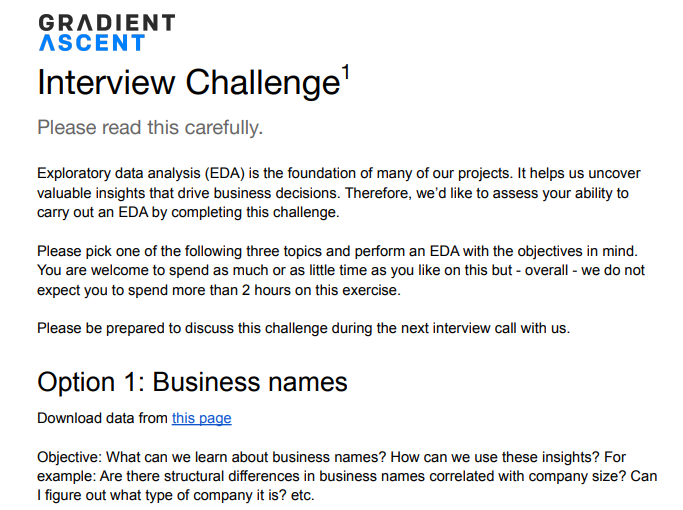

# Load Libraries 

In [1]:
import pandas as pd
import numpy as np
import warnings
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 999)
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows", 999)

In [2]:
import sklearn.metrics as metrics

# Load Data

In [6]:
train = pd.read_feather(
    "C:\\Users\\Zeus\\Downloads\\Road_To_Glory\\2022\\Gradient Ascent\\archive\\business_name_trainV1.feather"
)
train.drop(columns=['index'],inplace=True)
test = pd.read_feather(
    "C:\\Users\\Zeus\\Downloads\\Road_To_Glory\\2022\\Gradient Ascent\\archive\\business_name_testV1.feather"
)
test.drop(columns=['index'],inplace=True)

In [7]:
print(train.shape)
display(train.target.value_counts(normalize=True)*100)
display(train.head())
print(test.shape)
display(test.target.value_counts(normalize=True)*100)
display(test.head())

(6456083, 36)


0    95.957255
1     4.042745
Name: target, dtype: float64

,char_count_text_dump,content_word_count_text_dump,noun_count_text_dump,verb_count_text_dump,adj_count_text_dump,adv_count_text_dump,pron_count_text_dump,word_density_text_dump,avg_word_length_text_dump,noun_density_text_dump,avg_pos_density_text_dump,no_of_dots_text_dump,no_of_hyphen_text_dump,no_of_underscore_text_dump,no_of_equal_text_dump,no_of_forward_slash_text_dump,no_of_question_marks_text_dump,no_of_semicolon_text_dump,no_of_open_parenthesis_text_dump,no_of_mod_text_dump,no_of_ampersand_text_dump,no_of_@_text_dump,no_of_double_slash_text_dump,no_of_digits_text_dump,column_entropy_text_dump,delta_emp,year_founded,1 - 10,10001+,1001 - 5000,11 - 50,201 - 500,5001 - 10000,501 - 1000,51 - 200,target
0,68,8,6,0,2,0,0,7.555556,0.115942,0.666667,0.177778,4,4,0,0,0,0,0,0,0,0,0,0,0,3.912985,0,1996,1,0,0,0,0,0,0,0,0
1,68,7,4,2,1,0,0,8.500000,0.101449,0.500000,0.175000,4,6,0,0,0,0,0,0,0,0,0,0,0,3.547813,3,1925,1,0,0,0,0,0,0,0,0
2,67,7,2,3,2,0,0,8.375000,0.102941,0.250000,0.175000,1,2,0,0,0,0,0,0,0,0,0,0,0,3.719617,0,2005,1,0,0,0,0,0,0,0,0
3,89,8,5,2,1,0,0,9.888889,0.088889,0.555556,0.177778,1,4,0,0,0,0,0,0,0,0,0,0,0,4.138616,1,-999,1,0,0,0,0,0,0,0,0
4,109,14,8,1,3,0,0,7.266667,0.127273,0.533333,0.160000,0,0,0,0,0,0,0,0,0,1,0,0,0,4.020939,1,2007,0,0,0,1,0,0,0,0,0


(717343, 36)


0    95.957304
1     4.042696
Name: target, dtype: float64

,char_count_text_dump,content_word_count_text_dump,noun_count_text_dump,verb_count_text_dump,adj_count_text_dump,adv_count_text_dump,pron_count_text_dump,word_density_text_dump,avg_word_length_text_dump,noun_density_text_dump,avg_pos_density_text_dump,no_of_dots_text_dump,no_of_hyphen_text_dump,no_of_underscore_text_dump,no_of_equal_text_dump,no_of_forward_slash_text_dump,no_of_question_marks_text_dump,no_of_semicolon_text_dump,no_of_open_parenthesis_text_dump,no_of_mod_text_dump,no_of_ampersand_text_dump,no_of_@_text_dump,no_of_double_slash_text_dump,no_of_digits_text_dump,column_entropy_text_dump,delta_emp,year_founded,1 - 10,10001+,1001 - 5000,11 - 50,201 - 500,5001 - 10000,501 - 1000,51 - 200,target
0,56,6,4,2,0,0,0,8.000000,0.105263,0.571429,0.171429,3,1,0,0,0,0,0,0,0,0,0,0,0,3.907416,3,-999,0,0,0,1,0,0,0,0,0
1,86,10,7,0,3,0,0,7.818182,0.114943,0.636364,0.181818,1,1,0,0,0,0,0,0,0,0,0,0,0,3.839616,33,1966,0,0,0,0,0,0,0,1,0
2,118,11,6,0,5,0,0,9.833333,0.092437,0.500000,0.183333,1,2,0,0,0,0,0,0,0,0,0,0,0,4.135685,1,-999,1,0,0,0,0,0,0,0,1
3,104,10,5,2,3,0,0,9.454545,0.095238,0.454545,0.181818,1,1,0,0,0,0,0,0,0,0,0,0,0,4.313804,0,-999,1,0,0,0,0,0,0,0,0
4,60,5,3,2,0,0,0,10.000000,0.081967,0.500000,0.166667,1,0,0,0,0,0,0,0,0,0,0,0,0,3.839305,0,2008,1,0,0,0,0,0,0,0,0


# Model 

## Fit

In [111]:
clf = xgb.XGBClassifier(tree_method='gpu_hist',
                        max_depth=5,
                        learning_rate=0.03,
                        n_estimators=350,
                        objective='binary:logistic',
                        booster='gbtree',
                        n_jobs=-1,
                        random_state=9,
                        missing=-999.0,
                        verbose=0,
                        importance_type='total_gain',
                        scale_pos_weight=0.8)

In [112]:
eval_set = [
    (train[feature_impDF[feature_impDF.Values > 0]["Features_Name"].tolist()
            ], train.target),
    (test[feature_impDF[feature_impDF.Values > 0]["Features_Name"].tolist()],
     test.target)
]

In [113]:
clf.fit(train[~train.duplicated()][feature_impDF[feature_impDF.Values > 0]
                                   ["Features_Name"].tolist()],
        train[~train.duplicated()].target,
        eval_metric=["error", "auc"],
        eval_set=eval_set,
        verbose=100)

[15:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.04043	validation_0-auc:0.91467	validation_1-error:0.04043	validation_1-auc:0.91364
[100]	validation_0-error:0.04043	validation_0-auc:0.92522	validation_1-error:0.04043	validation_1-auc:0.92438
[200]	validation_0-error:0.03917	validation_0-auc:0.92879	validation_1-error:0.03922	validation_1-auc:0.92806
[300]	validation_0-error:0.03810	validation_0-auc:0.93034	validation_1-error:0.03815	validation_1-auc:0.92949
[349]	validation_0-error:0.03785	validation_0-auc:0.93115	validation_1-error:0.03793	validation_1-auc:0.93023


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='total_gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=-999.0, monotone_constraints='()',
              n_estimators=350, n_jobs=-1, num_parallel_tree=1, random_state=9,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.8, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbose=0,
              verbosity=None)

## Learning-Curve

In [114]:
results = clf.evals_result()
x_axis  = range(0,len(results['validation_0']['error']))

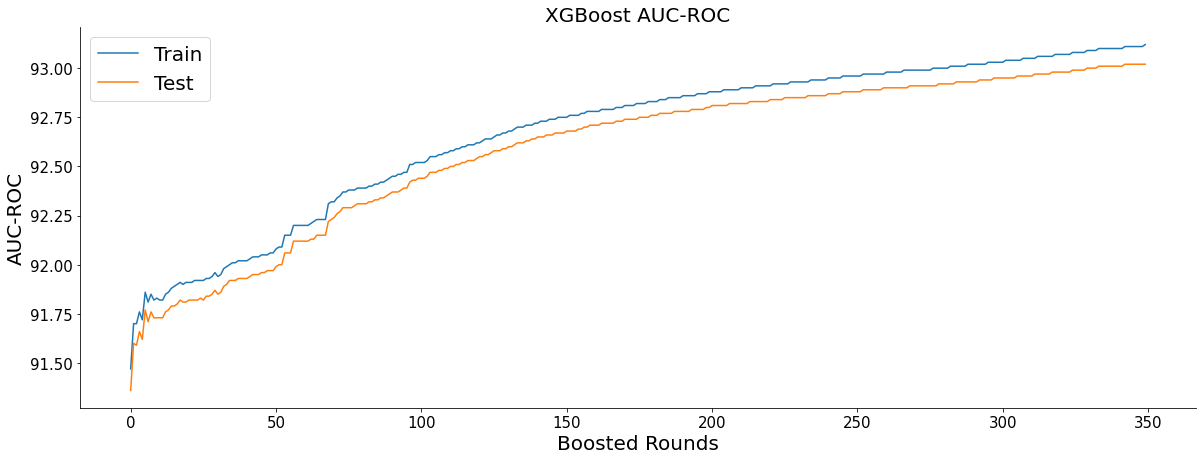

In [115]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.despine(fig)
ax.plot(x_axis, [round(x, 4) * 100 for x in results["validation_0"]["auc"]],
        label="Train")
ax.plot(x_axis, [round(x, 4) * 100 for x in results["validation_1"]["auc"]],
        label="Test")
ax.legend()
plt.rc("xtick", labelsize=15)
plt.rc("ytick", labelsize=15)
plt.xticks(rotation=0)
plt.rc("axes", labelsize=20)
plt.rc("legend", fontsize=20)
plt.ylabel("AUC-ROC", fontdict={'fontsize': 20})
plt.xlabel("Boosted Rounds", fontdict={'fontsize': 20})
plt.title("XGBoost AUC-ROC", fontdict={"fontsize": 20})
plt.show()
del fig, ax

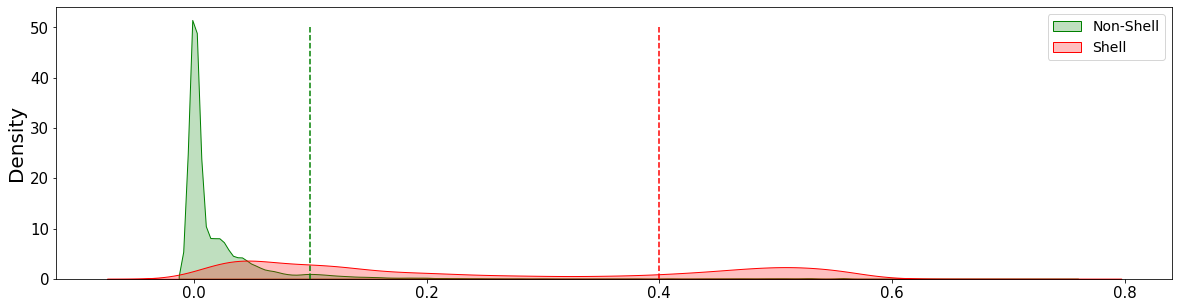

In [123]:
plt.figure(figsize=(20, 5))
sns.despine()
sns.kdeplot(clf.predict_proba(test[test.target == 0][feature_impDF[
    feature_impDF.Values > 0]["Features_Name"].tolist()])[:, 1],
            shade=True,
            color="g")
sns.kdeplot(clf.predict_proba(test[test.target == 1][feature_impDF[
    feature_impDF.Values > 0]["Features_Name"].tolist()])[:, 1],
            shade=True,
            color="r")
plt.legend(['Non-Shell', 'Shell'], fontsize=14)
plt.vlines(x=0.1, ymin=0, ymax=50, color='green', linestyle='--')
plt.vlines(x=0.4, ymin=0, ymax=50, color='red', linestyle='--')
plt.show();

## Evaluate

In [120]:
print("Train")
print(
    metrics.classification_report(
        train.target,
        np.where(
            clf.predict_proba(train[feature_impDF[feature_impDF.Values > 0]
                                    ["Features_Name"].tolist()])[:, 1] > 0.2,
            1, 0)))

Train
              precision    recall  f1-score   support

           0       0.98      0.98      0.98   6195080
           1       0.48      0.47      0.47    261003

    accuracy                           0.96   6456083
   macro avg       0.73      0.73      0.73   6456083
weighted avg       0.96      0.96      0.96   6456083



In [121]:
print("Test")
print(
    metrics.classification_report(
        test.target,
        np.where(
            clf.predict_proba(test[feature_impDF[feature_impDF.Values > 0]
                                   ["Features_Name"].tolist()])[:, 1] > 0.2, 1,
            0)))

Test
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    688343
           1       0.47      0.47      0.47     29000

    accuracy                           0.96    717343
   macro avg       0.73      0.72      0.72    717343
weighted avg       0.96      0.96      0.96    717343



## Feature Importance

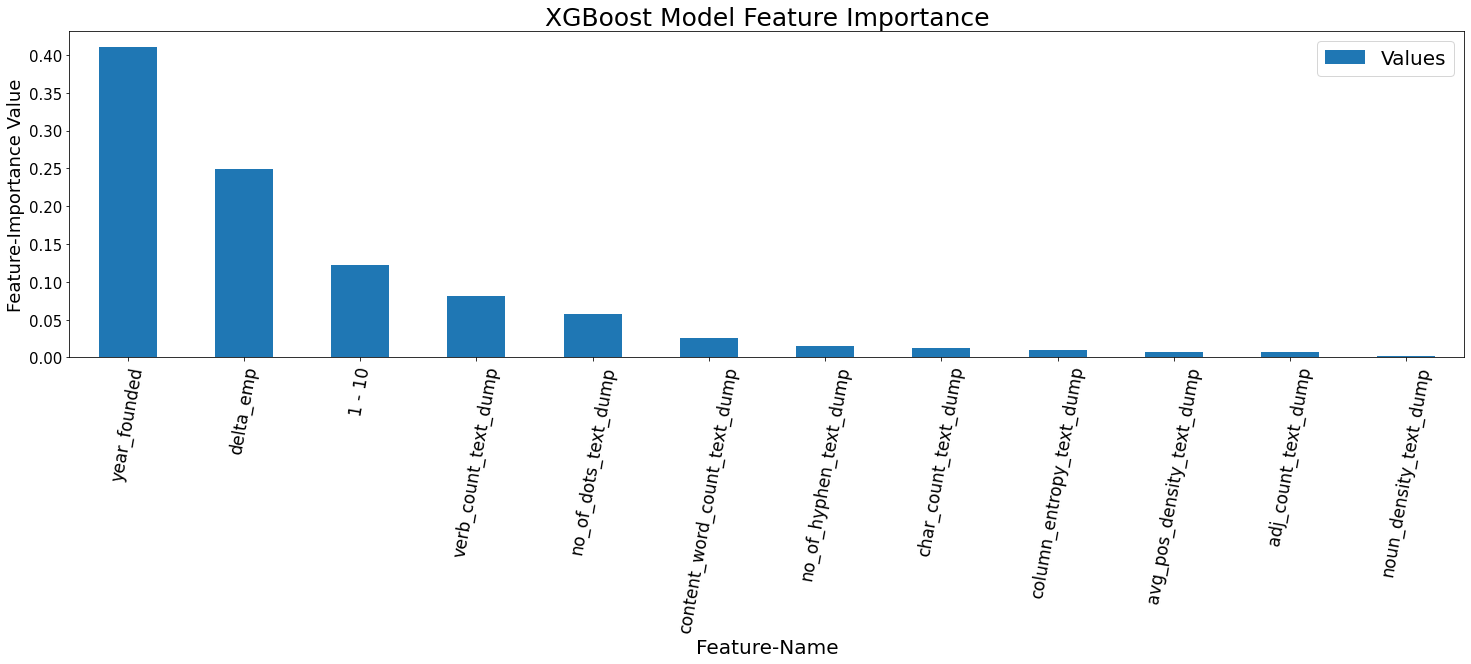

In [118]:
pd.DataFrame(sorted(zip(clf.feature_importances_,
                        feature_impDF[feature_impDF.Values > 0]
                                   ["Features_Name"].tolist()),
                    reverse=True),
             columns=['Values', 'Features_Name']).plot(kind='bar',
                                                       x='Features_Name',
                                                       y='Values',
                                                       figsize=(25, 6))
plt.title("XGBoost Model Feature Importance", fontdict={'fontsize': 25})
plt.xlabel("Feature-Name", fontdict={'fontsize': 20})
plt.ylabel("Feature-Importance Value", fontdict={'fontsize': 18})
plt.xticks(fontsize=17, rotation=80)
plt.yticks(fontsize=15);

In [44]:
feature_impDF = pd.DataFrame(sorted(zip(clf.feature_importances_,
                        train.columns.tolist()[:-1]),
                    reverse=True),
             columns=['Values', 'Features_Name'])

In [48]:
feature_impDF[feature_impDF.Values>0]["Features_Name"].tolist()

['year_founded',
 'verb_count_text_dump',
 'adj_count_text_dump',
 '1 - 10',
 'delta_emp',
 'no_of_dots_text_dump',
 'content_word_count_text_dump',
 'column_entropy_text_dump',
 'no_of_hyphen_text_dump',
 'avg_pos_density_text_dump',
 'char_count_text_dump',
 'noun_density_text_dump']

In [62]:
['year_founded',
 'verb_count_text_dump',
 'adj_count_text_dump',
 '1 - 10',
 'no_of_dots_text_dump',
 'content_word_count_text_dump',
 'column_entropy_text_dump',
 'no_of_hyphen_text_dump',
 'avg_pos_density_text_dump',
 'char_count_text_dump',
 'noun_density_text_dump']

['year_founded',
 'verb_count_text_dump',
 'adj_count_text_dump',
 '1 - 10',
 'delta_emp',
 'no_of_dots_text_dump',
 'content_word_count_text_dump',
 'column_entropy_text_dump',
 'no_of_hyphen_text_dump',
 'avg_pos_density_text_dump',
 'char_count_text_dump',
 'noun_density_text_dump']